In [3]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# other
import missingno as msno
import joblib
import tarfile
import os
import urllib

### Scikit-learn

from sklearn import datasets
from sklearn import utils
# Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Algorithms
from sklearn.svm import LinearSVR, LinearSVC
from sklearn.svm import SVC, SVR

## SVM for  Classification

get the widest possible street and limiting margin violations

**it can be handeled using 'C' Hyper-parameter**

**'C' Hyper-parameter is used also for Regularization, by decreasing C > reducing overfitting**

### First : for Linear Data (iris)

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names+['target'])

# shuffle the data
df_iris = utils.shuffle(df_iris)

X = df_iris[['petal length (cm)', 'petal width (cm)']].astype(np.float64)
y = df_iris['target'].astype(np.float64)

#### LinearSVC

In [3]:
## standardization firstly

X = X.copy() 

my_scalar = StandardScaler()

X = my_scalar.fit_transform(X)

In [4]:
best_params = {'C': range(1,150,5)}
linear_svc = LinearSVC(C=1, loss='hinge', max_iter=10000)  ### decreasing C >> reducing Overfitting

In [5]:
grid_search = GridSearchCV(estimator=linear_svc, 
                           param_grid=best_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)
linear_best = grid_search.best_estimator_

In [6]:
scores = cross_val_score(linear_best, X, y, cv=5, n_jobs=-1, scoring='accuracy')
print('scores =>', scores)
print('mean =>', scores.mean())
print('std =>', scores.std())

scores => [1.         0.93333333 0.96666667 0.96666667 1.        ]
mean => 0.9733333333333334
std => 0.02494438257849294


In [7]:
y_scores_predict = cross_val_predict(linear_best, X, y, cv=5, n_jobs=-1, method='predict')

<AxesSubplot:>

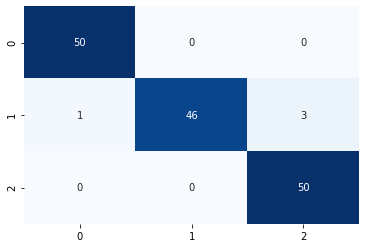

In [8]:
conf_matrix = confusion_matrix(y, y_scores_predict)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

#### SVC

In [9]:
svc_clf = SVC(C=50, kernel='linear', max_iter=10000)

scores_svc = cross_val_score(svc_clf, X, y, cv=5, n_jobs=-1, scoring='accuracy')
print('scores_svc =>', scores_svc)
print('mean =>', scores_svc.mean())
print('std =>', scores_svc.std())

scores_svc => [0.93333333 0.96666667 0.96666667 0.93333333 1.        ]
mean => 0.96
std => 0.024944382578492935


## SVC using kernel='poly'

In [10]:
moons = datasets.make_moons()

In [11]:
X_moon, y_moon = moons[0], moons[1]

In [12]:
df_moons = pd.DataFrame(np.c_[X_moon, y_moon], columns=['X1', 'X2', 'target'])
df_moons = utils.shuffle(df_moons)

X_moons = df_moons[['X1', 'X2']]
y_moons = df_moons['target']

In [13]:
scalar_poly = StandardScaler()
X_moons = scalar_poly.fit_transform(X_moons)

In [14]:
svc_poly = SVC(kernel='poly', coef0=1.0, C=5, degree=10)

In [15]:
best_params_poly = {'C': np.arange(1,50,10), 'degree': np.arange(2,20,10), 'coef0': np.arange(0,5,1)}

In [16]:
grid_search_poly = GridSearchCV(svc_poly, 
                                param_grid=best_params_poly, 
                                scoring='accuracy',
                                n_jobs=-1, cv=3)

grid_search_poly.fit(X_moons, y_moons)

GridSearchCV(cv=3, estimator=SVC(C=5, coef0=1.0, degree=10, kernel='poly'),
             n_jobs=-1,
             param_grid={'C': array([ 1, 11, 21, 31, 41]),
                         'coef0': array([0, 1, 2, 3, 4]),
                         'degree': array([ 2, 12])},
             scoring='accuracy')

In [17]:
best_poly = grid_search_poly.best_estimator_

In [18]:
scores_poly = cross_val_score(best_poly, X_moons, y_moons, cv=3, n_jobs=-1, scoring='accuracy')
print('scores_poly =>', scores_poly)

scores_poly => [1. 1. 1.]


In [19]:
y_scores_poly = cross_val_predict(best_poly, X_moons, y_moons, cv=3, n_jobs=-1, method='predict')

<AxesSubplot:>

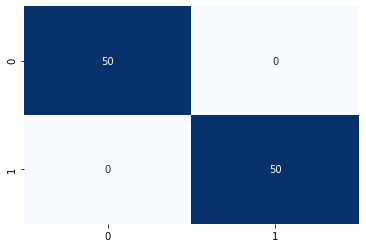

In [20]:
sns.heatmap(confusion_matrix(y_moons, y_scores_poly), fmt='g', annot=True, cmap='Blues', cbar=False)

## SVC using kernel='rbf'

**rbf stands for >> Gaussian - Radial Basis Function**

In [21]:
svc_rbf = SVC(kernel='rbf', gamma=1, C=1)

In [22]:
best_params_rbf = {'C': np.arange(1, 50, 10), 'gamma': np.arange(0.1, 5, 0.9)}

In [23]:
grid_search_rbf = GridSearchCV(svc_rbf, 
                                param_grid=best_params_rbf, 
                                scoring='accuracy',
                                n_jobs=-1, cv=3)

grid_search_rbf.fit(X_moons, y_moons)

GridSearchCV(cv=3, estimator=SVC(C=1, gamma=1), n_jobs=-1,
             param_grid={'C': array([ 1, 11, 21, 31, 41]),
                         'gamma': array([0.1, 1. , 1.9, 2.8, 3.7, 4.6])},
             scoring='accuracy')

In [24]:
best_params_rbf2 = {'C': np.arange(0.01, 2, 0.1), 'gamma': np.arange(0.1, 2, 0.2)}

grid_search_rbf = GridSearchCV(svc_rbf, 
                                param_grid=best_params_rbf2, 
                                scoring='accuracy',
                                n_jobs=-1, cv=3)

grid_search_rbf.fit(X_moons, y_moons)

GridSearchCV(cv=3, estimator=SVC(C=1, gamma=1), n_jobs=-1,
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91]),
                         'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])},
             scoring='accuracy')

In [25]:
best_rbf = grid_search_rbf.best_estimator_

In [26]:
scores_rbf = cross_val_score(best_rbf, X_moons, y_moons, cv=3, n_jobs=-1, scoring='accuracy')
print('scores_rbf =>', scores_rbf)

scores_rbf => [1. 1. 1.]


In [27]:
y_scores_rbf = cross_val_predict(best_rbf, X_moons, y_moons, cv=3, n_jobs=-1, method='predict')

<AxesSubplot:>

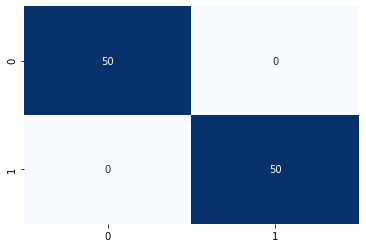

In [28]:
sns.heatmap(confusion_matrix(y_moons, y_scores_rbf), fmt='g', annot=True, cmap='Blues', cbar=False)

## SVM Regression

### SVR for Linear

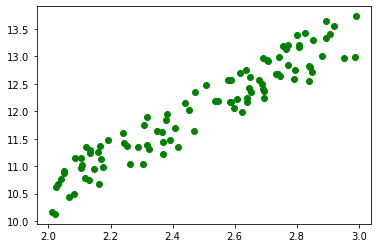

In [29]:
X = 2 + np.random.rand(100, 1)
y = np.squeeze(4 + 3 * X + np.random.rand(100, 1))
plt.plot(X, y, 'go');

#### Using LinearSVR

In [30]:
scalar_reg = StandardScaler()

X = scalar_reg.fit_transform(X)

In [31]:
linear_svr = LinearSVR(epsilon=1.5, C=1.0, max_iter=10000)

In [32]:
best_params_reg = {'epsilon': np.arange(0.1,5,0.5), 'C': np.arange(1,10,1)}

grid_search_reg = GridSearchCV(linear_svr, 
                               param_grid=best_params_reg,
                               cv=3, 
                               n_jobs=-1, 
                               scoring='neg_mean_squared_log_error')

grid_search_reg.fit(X, y)

GridSearchCV(cv=3, estimator=LinearSVR(epsilon=1.5, max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'epsilon': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6])},
             scoring='neg_mean_squared_log_error')

In [33]:
best_reg_linear = grid_search_reg.best_estimator_

In [34]:
scores_neg_mse_log = cross_val_score(best_reg_linear, X, y, 
                                     cv=3, 
                                     n_jobs=-1, 
                                     scoring='neg_mean_squared_log_error')

rmse_log_scores = np.sqrt(-scores_neg_mse_log)
print('rmse_log_scores =>', rmse_log_scores)

rmse_log_scores => [0.02273168 0.02131139 0.01889448]


#### Using SVR

In [35]:
svr_reg = SVR(kernel='linear', epsilon=0.1, C=7)

scores_svr_negLog = cross_val_score(svr_reg, X, y, cv=3, 
                                    n_jobs=-1, scoring='neg_mean_squared_log_error')

rmse_log_scores_svr = np.sqrt(-scores_svr_negLog)
print('rmse_log_scores_svr =>', rmse_log_scores_svr)

rmse_log_scores_svr => [0.0229439  0.02124109 0.01896126]


### SVR for Polynomial

In [5]:
X = 6 * np.random.rand(100, 1) - 3
y = np.squeeze(0.5 * X**2 + X + 2 + np.random.rand(100, 1))

In [6]:
svr_reg_poly = SVR(kernel='rbf', C=10, epsilon=0.2, degree=5)

In [7]:
params_best_poly = {'kernel':['rbf', 'poly'], 
                    'epsilon': np.arange(1, 5, 0.5), 
                    'degree': np.arange(1, 5, 2),
                    'gamma': np.arange(0.1, 4, 0.5),
                    'C': np.arange(0.1, 5, 0.6)}

In [8]:
grid_search_reg_poly = GridSearchCV(svr_reg_poly, 
                                    param_grid=params_best_poly, 
                                    cv=3, 
                                    scoring='neg_mean_squared_log_error', n_jobs=-1)

grid_search_reg_poly.fit(X, y)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.08201764 -0.1056154  -0.06622336 ... -0.37831199 -0.37831199
 -0.37831199]
  warnings.warn(


GridSearchCV(cv=3, estimator=SVR(C=10, degree=5, epsilon=0.2), n_jobs=-1,
             param_grid={'C': array([0.1, 0.7, 1.3, 1.9, 2.5, 3.1, 3.7, 4.3, 4.9]),
                         'degree': array([1, 3]),
                         'epsilon': array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'gamma': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6]),
                         'kernel': ['rbf', 'poly']},
             scoring='neg_mean_squared_log_error')

In [12]:
best_model_reg_poly = grid_search_reg_poly.best_estimator_

In [13]:
scores_reg_poly = cross_val_score(best_model_reg_poly, X, y, 
                                  cv=3, 
                                  scoring='neg_mean_squared_log_error', n_jobs=-1)

rmse_log_poly = np.sqrt(-scores_reg_poly)
print('rmse_log_poly =>', rmse_log_poly)

rmse_log_poly => [0.13363432 0.12443616 0.168671  ]
